In [18]:
%load_ext autoreload
%autoreload 2
from useful_scit.imps import *
import flexpart_management.modules.FlexLogPol as FLP
import flexpart_management.modules.constants as co
import flexpart_management.modules.flx_array as fa

plt.style.use('ggplot')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

reload


In [7]:
from wrf_management.modules.pblh_recalc.wrf_variable_io import *
from wrf_management.modules.pblh_recalc.wrf_basic_analysis_vars import *
from wrf_management.modules.pblh_recalc.PBLH_recalc import *
from wrf_management.modules.pblh_recalc.PBLH_plot import *
import numpy as np

In [ ]:
# ~~~~~~~~~~~~~~~~ define important strings ~~~~~~~~~~~~~~~~~~~~~~~~
wrf_directory = './files' ##location of the wrf directory
file_name = 'wrfout_d02_2006-09-12_00:00:00' #wild card is supported if multiple wrf files are present

plot_richardson_direc = './richardson_plots/'
plot_temp_grad_direc = './temper_grad_plots/'
plot_real_wrf_pblh = './wrf_output_plots/'

##note to change this string for SINGLE FILE if wild card is used to extract across multiple files above^^
single_netcdf_file = wrf_directory+'/'+file_name ##location of a single wrfout file (needed for plotting)

In [8]:
wrf_directory = '/tmp'
file_name = 'wrfout_d04_2018-04-08_15:00:00'

In [9]:
# ~~~~~~~~~~~~~~~~ define important lists ~~~~~~~~~~~~~~~~~~~~~~~~~~~

variables = ['theta','QVAPOR','ua','va','height','tv','PBLH']
static_variables = ['XLAT','XLONG']

# ~~~~~~~~~~~~~~~~~ extract variables ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

##these values are extracted and saved in directories as described by 
## wrf_variable_io

tensor_directory = wrf_extract_var_tensor(wrf_directory, file_name,variables)

static_directory = wrf_extract_var_constants(wrf_directory,file_name,static_variables)

# ~~~~~~~~~~~~~~~~~~ load in variables needed for PBLH analysis ~~~~~~~~~~~~~~~~~~~~~~~

/Users/diego/wrf_management/wrf_management/modules/pblh_recalc
------Extracting Variable theta------ 
------Extracting Variable QVAPOR------ 
------Extracting Variable ua------ 
------Extracting Variable va------ 
------Extracting Variable height------ 
------Extracting Variable tv------ 
------Extracting Variable PBLH------ 
-----Extract Variables Finished----
/Users/diego/wrf_management/wrf_management/modules/pblh_recalc
/Users/diego/wrf_management/wrf_management/modules/pblh_recalc/exctracted_vars/ Directory Failed to Create. May be already present
------Extracting Variable XLAT------ 
------Extracting Variable XLONG------ 
-----Extract Variables Finished----


In [58]:
##Tensor variables
theta   = np.load(tensor_directory+'theta.npy')      #K
qvapor  = np.load(tensor_directory+'QVAPOR.npy')     #unitless
uwind   = np.load(tensor_directory+'ua.npy')         #m/s
vwind   = np.load(tensor_directory+'va.npy')         #m/s
height  = np.load(tensor_directory+'height.npy')     #m
tv      = np.load(tensor_directory+'tv.npy')         #k
PBLH    = np.load(tensor_directory+'PBLH.npy')       #m

## static variables
lats = np.load(static_directory+'XLAT.npy')                        #degrees
lons = np.load(static_directory+'XLONG.npy')                       #degrees

# ~~~~~~~~~~~~~~~~ Recalculation of important Variables ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
##full descriptions found in wrf_basic_analysis_vars

##virtual potential temperature
theta_v = virtual_potential_temp(theta,qvapor)        #K
 
##richardson number, and corresponding heights of richardson number

# richardson_num,rich_num_height = richardson_number_surface(height,theta_v,uwind,vwind,tv,0)
richardson_num,rich_num_height = richardson_number_profiles(height,theta_v,uwind,vwind,tv,0)

In [59]:
# ##temperature gradients 
# lapse_rate, lapse_rate_height = temperature_gradient(theta,height,2)

# # ~~~~~~~~~~~~~~~ Rediagnosing PBLH ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ## Full descriptions can be found in PBLH_recalc

# PBLH_richardson_heights = PBLH_richardson(richardson_num, rich_num_height, 0.2)
# PBLH_temp_grad_heights = PBLH_temp_grad(lapse_rate, lapse_rate_height, 2)

# wrf_save_var(PBLH_richardson_heights, './recalculated_vars','PBLH_richardson')
# wrf_save_var(PBLH_temp_grad_heights, './recalculated_vars','PBLH_temp_grad')

# # ~~~~~~~~~~~~~~~~ Plotting Software ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# PBLH_plot(PBLH_richardson_heights,lats,lons,single_netcdf_file,plot_richardson_direc)
# PBLH_plot(PBLH_temp_grad_heights,lats,lons,single_netcdf_file,plot_temp_grad_direc)
# PBLH_plot(PBLH,lats,lons,single_netcdf_file,plot_real_wrf_pblh)

In [60]:
richardson_num.shape

(4, 48, 150, 153)

In [61]:
df = richardson_num.flatten()
df = pd.DataFrame(df).dropna()

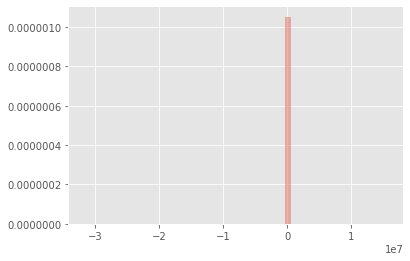

In [62]:
sns.distplot(df,kde=False,norm_hist=True)

In [65]:
df.quantile([0,.01,.5,.99,1])

,0
0.00,-3.181482e+07
0.01,-5.948875e+01
0.50,5.926604e+00
0.99,8.393899e+02
1.00,1.571791e+07


In [19]:
ds = xr.open_dataset(os.path.join(wrf_directory,file_name))

In [20]:
ds[]

<xarray.Dataset>
Dimensions:                (Time: 4, bottom_top: 49, bottom_top_stag: 50, soil_layers_stag: 4, south_north: 150, south_north_stag: 151, west_east: 153, west_east_stag: 154)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time,